In [1]:
import cubnm
import seaborn as sns
import matplotlib.pyplot as plt
import os
import copy
import pandas as pd
import numpy as np

import cubnm_paper

# set plots font and dpi
# Note: the font is not included in the repository
import matplotlib.font_manager
font_path = os.path.join(cubnm_paper.config.DATA_DIR, 'assets', 'Optima.ttc')
matplotlib.font_manager.fontManager.addfont(font_path)
font = matplotlib.font_manager.FontProperties(fname=font_path, size=12)
plt.rcParams.update({
    "font.family": font.get_name(),
    "figure.dpi": 600
})

thcolor = '#44546A'

In [2]:
optimizers = {
    'grid': cubnm_paper.data.load_grid(grid_shape=22),
}

for model in ['homo', '2maps', 'yeo']:
    optimizers['cmaes_'+model] = cubnm_paper.data.load_cmaes(
        sub="group-train706",
        ses="",
        het_mode=model,
        seed=1,
        popsize=128,
        n_iter=120,
    )
    
emp_fc_tril = cubnm.datasets.load_fc('schaefer-100', 'group-train706', exc_interhemispheric=True, return_tril=True)
emp_fcd_tril = cubnm.datasets.load_fcd('schaefer-100', 'group-train706', exc_interhemispheric=True, return_tril=True)

model_labels = {
    'grid': 'Homogeneous (Grid Search)',
    'cmaes_homo': 'Homogeneous (CMA-ES)',
    'cmaes_2maps': 'Map-based heterogeneous (CMA-ES)',
    'cmaes_yeo': 'Node-based heterogeneous (CMA-ES)',
}

/tmp/ipykernel_10843/83327228.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
/tmp/ipykernel_10843/83327228.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
/tmp/ipykernel_10843/83327228.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
/tmp/ipykernel_10843/83327228.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
/tmp/ipykernel_10843/83327228.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks,

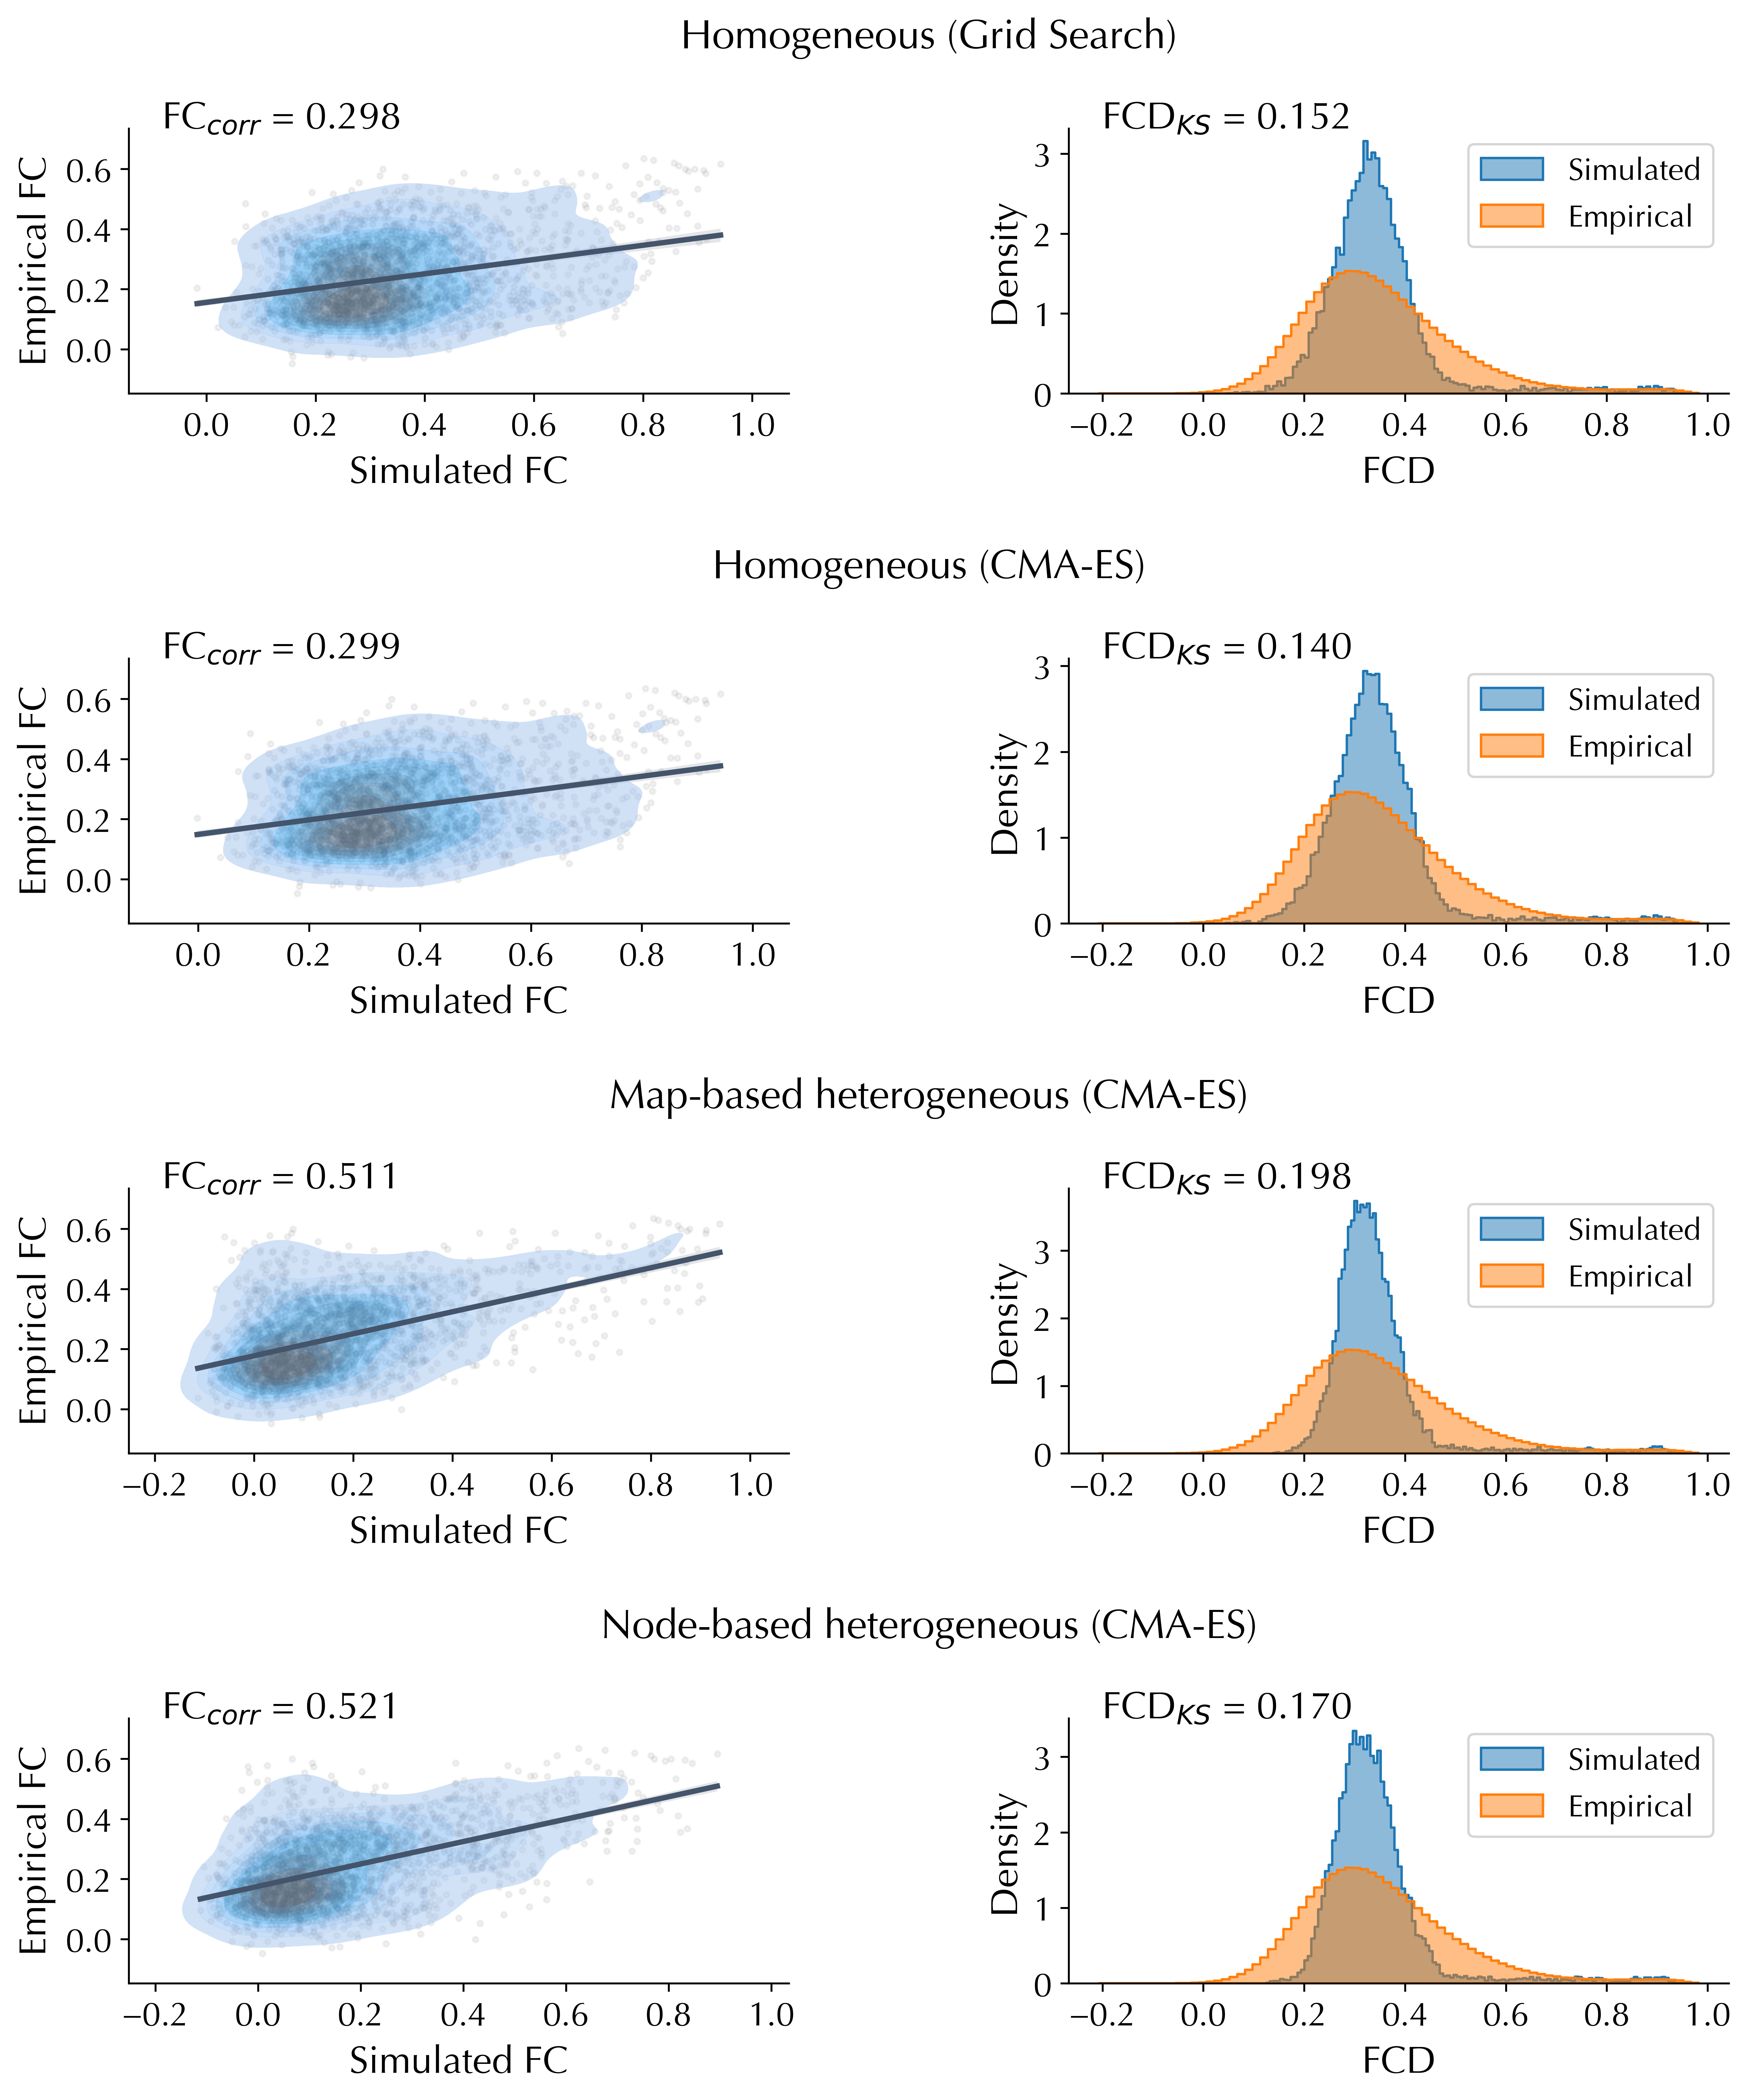

In [3]:
fig, axd = plt.subplot_mosaic(
    [[f"fc_{model}", f"title_{model}", f"fcd_{model}"] for model in optimizers.keys()],
    gridspec_kw=dict(width_ratios=[5, 0.1, 5]),
    figsize=(12, 14)
)

for i, (model, optimizer) in enumerate(optimizers.items()):
    # FC
    ax = axd[f"fc_{model}"]
    sns.regplot(
        x=optimizer.opt_sim_data['sim_fc_trils'][0],
        y=emp_fc_tril,
        scatter_kws=dict(s=5, alpha=0.1, color="grey"),
        line_kws=dict(color="#44546A"),
        ax=ax
    )
    sns.kdeplot(
        x=optimizer.opt_sim_data['sim_fc_trils'][0],
        y=emp_fc_tril,
        fill=True,
        alpha=0.5,
        ax=ax
    )

    ax.set_xlabel("Simulated FC", fontsize=16)
    ax.set_ylabel("Empirical FC", fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
    text_x = ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.05
    text_y = ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*1
    ax.text(
        text_x, text_y,
        r"FC$_{corr}$ = "f"{optimizer.opt['+fc_corr']:.3f}",
        fontsize=16
    )

    # FCD
    ax = axd[f"fcd_{model}"]
    sns.histplot(
        optimizer.opt_sim_data['sim_fcd_trils'][0], 
        element='step', 
        alpha=0.5, 
        label='Simulated', 
        stat='density', 
        ax=ax
    )
    sns.histplot(
        emp_fcd_tril, 
        element='step', 
        alpha=0.5, 
        label='Empirical', 
        stat='density', 
        ax=ax
    )
    ax.legend(fontsize=13)
    ax.set_xlabel("FCD", fontsize=16)
    ax.set_ylabel("Density", fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
    text_x = ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.05
    text_y = ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*1
    ax.text(
        text_x, text_y,
        r"FCD$_{KS}$ = "f"{-optimizer.opt['-fcd_ks']:.3f}",
        fontsize=16
    )
    # title
    ax = axd[f"title_{model}"]
    ax.set_title(model_labels[model], y=1.25, fontsize=17)
    ax.axis('off')
sns.despine()
plt.subplots_adjust(wspace=0.3, hspace=1.0)
fig.savefig('S_opt_fits.png', transparent=True, bbox_inches='tight')